In [1]:
# My GitHubRepo - https://github.com/RohitDhankar
#
# Python 3.5 Notebook to be uploaded to Kaggle - Python 3.5 virtual env activated - usually work with 2.7 
#
#conda create -n py35 python=3.5 ipykernel
#source activate py35
#
# conda create -n py27 python=2.7 ipykernel
# source activate py27


# STEP -1
### Feature Reduction - defined as Reducing Number of Features ,utilized for Classification. 
 Before we proceed with Classification - we "may need" - Feature Reduction. Feature reduction is also known as Dimensionality Reduction. 
 WIKI - https://en.wikipedia.org/wiki/Dimensionality_reduction


### Factor Analysis - Factor Analysis is in ceratin litterature quoted as a Feature Reduction technique , but its NOT to be considered so . 
  Quoting Prof Mitra IIT Kanpur - Source - http://textofvideo.nptel.iitm.ac.in/111104024/lec38.pdf
   "FA explains the covariance structure or the  variance  covariance  structure, of  a  random  vector in terms  of  a  few  underlying  unobservable  factors." 

 According to Wiki quoted below - Exploratory Factor Analysis is the better option - compared to PCA 

###   " Clearly though, PCA is a more basic version of exploratory factor analysis (EFA) that was developed in the early days prior to the advent of high-speed computers. From the point of view of exploratory analysis, the eigenvalues of PCA are inflated component loadings, i.e., contaminated with error variance"

 Source --- https://en.wikipedia.org/wiki/Factor_analysis
 EFA , FA - Not done yet for this Data Set as i dont think there is a need for the same . PCA done that too may not turn out to be effective or desired. 


# STEP -3
### Principal Component Analysis - PCA 
 PCA is usually not done for a Data Set if most Features are Categorical.  Thus i dont see a need for a PCA here but we shall still do a PCA and see how the predictions are in comparison to a Non PCA RAW DATA set. 
 
 Source :-  http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html#sphx-glr-auto-examples-plot-compare-reduction-py
 When a PCA is undertaken:- 
 - We dont include RESPONSE variable - Attrited Employees == "left".
 - Cant include any other Binomial Or Categorical Variables.
 - Categorical to be included only when we use "advanced methods" for PCA.
 - Advanced methods for PCA :- http://stats.stackexchange.com/questions/14002/whats-the-difference-between-principal-component-analysis-and-multidimensional/14013#14013
 - Advanced methods out of scope for now.ToBeDone - Try with "advanced methods" including Categorical Variables. 


# STEP -4
### Pre Processing Data 
### Standardize Variables :- 
   - "Democracy amongst Variables" lets ensure All features have- Mean =0 and Variance =1 

### Multiple options for SCALING and STANDARDIZATION with scikitlearn 
- Option -1 sklearn.preprocessing.scale - Not Done. Type= Function.
- Option -2 sklearn.preprocessing.StandardScaler -Done. Type= Utility Class. 
- Option -3 MinMax Scaler -Not Required with this DataSet.

## Dataset Train & Test Split -- k Fold CrossValidation with StartShuffleSplit - Done 

# STEP -5 
### Choosing Classifiers :- 

- Logistic Regression 
- kNN - k Nearest Neighbour
- Naive Bayes - Done but rejected - as not a good choice for this Dataset. 
- Neural Network [MLP] Multi Layer Perceptron - TBD 
- Support Vector Machine - TBD 
- Decision Tree - TBD 
- Random Forests - TBD 
- XGBoost - TBD 
- TPOT and other "Related Projects" -- http://scikit-learn.org/stable/related_projects.html#related-projects
- Pipeline the Classifiers - discover other options to auto-mate with Pipeline 
- Keras , TensorFlow , Theano - what else have you ? 


# STEP -6
### Model Evaluation
 Need to ensure CLASSIFICATION ACCURACY displayed by Model on any Test data set
 is greater than - Ratio of Classes in Sample or Population  [All Train + All Test sets] 

# STEP -7 - TBD 
 Advanced Data Visualization 
 Plot AUC and ROC Curves etc -[ToBeDone Later]-- look at own code from RStats and earlier Py27 Notebooks.  

# STEP -8
 Look at Excel worksheets and R Parallels for this Project - using same Sample Data Set. Compare Performance as per Accuracy and Time etc. 

# STEP 9 
 Further investigation - Survival Analysis :- predicting when an employee is most likely to Churn or Exit. 



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) # On Kaggle 
print(check_output(["ls", "/home/dhankar/spark-2.0.2-bin-hadoop2.7/DHANK/__Kaggle"]).decode("utf8")) # Offline 

# /home/dhankar/spark-2.0.2-bin-hadoop2.7/DHANK/__Kaggle
# https://docs.python.org/3.5/library/subprocess.html#subprocess.check_output

# Any results you write to the current directory are saved as output.

Decision_Tree_HR_Analytics.ipynb
dfh1_Test.csv
dfh_Test.csv
HR_Analytics_IBM_WATSON_SampleDataSet_7.ipynb
HR_comma_sep.csv
Kaggle_Copy_HR_Analytics_IBM_WATSON_SampleDataSet_7.ipynb
Kaggle_HRAnalyticsData_Py35.ipynb
Py35_Activate.txt
R_Scrpts
Untitled.ipynb



In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
%matplotlib inline

/home/dhankar/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
df = pd.read_csv("HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
mymap = {'accounting':1,'hr':2,'IT':3, 'management': 4 ,'marketing':3, 'product_mng' :5 , 
         'RandD':6,'sales':7,'support':8,'technical':9,}

#
dfh =df.applymap(lambda s: mymap.get(s) if s in mymap else s)
#
dfh.head(5)

# TBD- LabelEncoder - http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html
# http://pandas.pydata.org/pandas-docs/stable/indexing.html

#dfh.to_csv('dfh_Test.csv') # Ok for down csv 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low


In [6]:
mymap = {'low':1,'medium':2,'high':3}
#
dfh1 =dfh.applymap(lambda s: mymap.get(s) if s in mymap else s)
#
dfh1.head(5)
#
#dfh1.to_csv('dfh1_Test.csv') # Ok for down csv 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [7]:
dfh2 = dfh1.drop(df.columns[[6]],axis=1,inplace=False) # Drop the Target Feature
print(dfh2.head(5))
print ("_"*90)
print (dfh2.shape)
names = dfh2.columns.values
print ("_"*90)
print (names)
dfh3 = pd.DataFrame(dfh1["left"]) #  Interim DF only -Target Feature
names1 = dfh3.columns.values
print ("_"*90)
print (names1)
print ("_"*90)
print (dfh3.shape)
print ("_"*90)
print (dfh3["left"].value_counts()) # Here - 0 == Live Employee [11428] , 1 == Exited Employee / Attrited Employee[3571]
#


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  sales  salary  
0                   3              0                      0      7       1  
1                   6              0                      0      7       2  
2                   4              0                      0      7       2  
3                   5              0                      0      7       1  
4                   3              0                      0      7       1  
_________________________________________________________

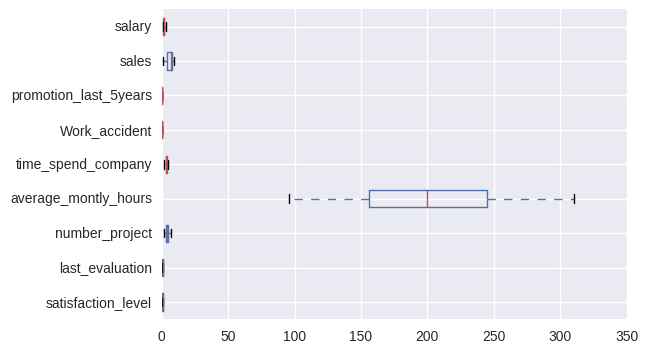

In [8]:
# Dataset boxplot for Means and Variances 
dfh2.plot(kind='box', vert=False)

# Seen below - Features have large Variance - data set needs std and scaling 

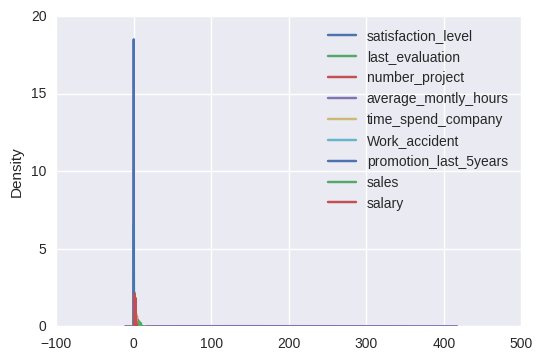

In [9]:
#  Density plot
dfh2.plot(kind='kde')
# No inference drawn as of now - To be Explored ..........??? 


--------------- CREATE A HEATMAP ---------------


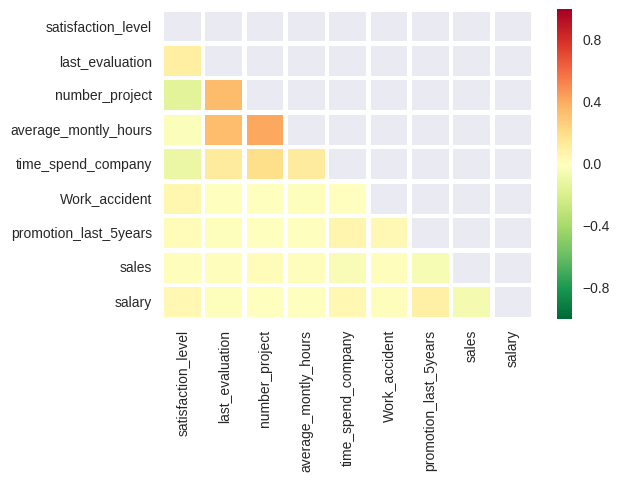

In [12]:
#Source -- http://www.tradinggeeks.net/2015/08/calculating-correlation-in-python/

print("--------------- CREATE A HEATMAP ---------------")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

### Inference from Corr Plot - 

- "Time_Spent_at_Company" - NEGATIVELY impacting - Satisfaction_Levels 
- "Last_Eval" - POSITIVELY Correlated with - "number_project" and "Average_Monthly_Hrs" seems higher performers get more work . 
- 

In [11]:
# Another Correlation from DFH2 Data 

corr_df = dfh2.corr(method='pearson')

print(corr_df.head(len(dfh2))) # Not required as we are plottng the Correlation above 

# We can look at Column 1 of the Print out below - see what all Features have a 
# greater than 0.1 Corr value - Negative or Positive both considered . 

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
promotion_last_5years            0.025605        -0.008684       -0.006064   
sales                            0.010765         0.007920        0.022636   
salary                           0.050022        -0.013002       -0.001803   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project    